In [1]:
import datetime as dt
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-10-07 to 2021-10-06
Data columns (total 6 columns):
Open         1257 non-null float64
High         1257 non-null float64
Low          1257 non-null float64
Close        1257 non-null float64
Adj Close    1257 non-null float64
Volume       1257 non-null float64
dtypes: float64(6)
memory usage: 68.8 KB


,Close
Date,
2021-10-05,4.948624


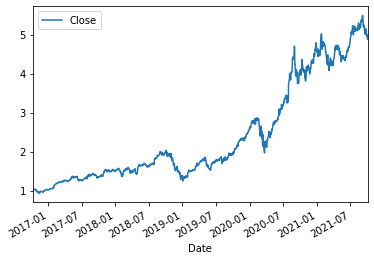

In [2]:
#CSV contains 5Y of data
raw = pd.read_csv('data/AAPL.csv',index_col=0,parse_dates=True)
raw.info()
data = (pd.DataFrame(raw['Close']).dropna())
datapct = data.pct_change().dropna()
(datapct+1).cumprod().plot()
(datapct+1).cumprod()[-1:]

# Sharpe Ratio
The Sharpe ratio is the most common ratio for comparing return to risk (standard deviation).

Sharpe = $(R_a -R_f)/$ $\sigma$

$R_a$ = Annual return of the asset  
$R_f$ = Annual risk-free rate. 


In [3]:
def sharpe_ratio(return_series,N,rf):
    mean = return_series.mean()*N -rf
    sigma = return_series.std()*np.sqrt(N)
    return mean/sigma

In [4]:
N= 255 #255 trading days in a year
rf= 0.01 #1% risk free rate
sharpe = datapct.apply(sharpe_ratio,args=(N,rf))
sharpe

Close    1.187104
dtype: float64

# Sortino Ratio
The Sortino ratio is similar to the Sharpe ration, but it only looks at negative deviations, since they represent potential losses.

Sortino = $(R_a -R_f)/$ $\sigma^-$

$R_a$ = Annual return of the asset  
$R_f$ = Annual risk-free rate.  
$\sigma^-$ = annualized down-side standard deviation 

In [5]:
def sortino_ratio(return_series,N,rf):
    mean = return_series.mean()*N-rf
    std_neg = return_series[return_series<0].std()*np.sqrt(N)
    return mean/std_neg

N= 255 #255 trading days in a year
rf= 0.01 #1% risk free rate
sortino = datapct.apply(sortino_ratio,args=(N,rf))
sortino 

Close    1.560987
dtype: float64

# Drawdown

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5360 entries, 2000-12-01 to 2021-10-07
Data columns (total 6 columns):
Open         5328 non-null float64
High         5328 non-null float64
Low          5328 non-null float64
Close        5328 non-null float64
Adj Close    5328 non-null float64
Volume       5328 non-null float64
dtypes: float64(6)
memory usage: 293.1 KB


,Close
Date,
2021-10-07,2.176437


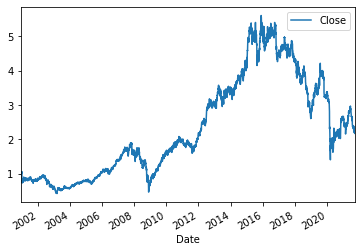

In [6]:
#Read data for AB INBEV
raw = pd.read_csv('data/ABI.BR.csv',index_col=0,parse_dates=True)
raw.info()
data = (pd.DataFrame(raw['Close']).dropna())
datapct = data.pct_change().dropna()
(datapct+1).cumprod().plot()
(datapct+1).cumprod()[-1:]

Close   -0.753621
dtype: float64

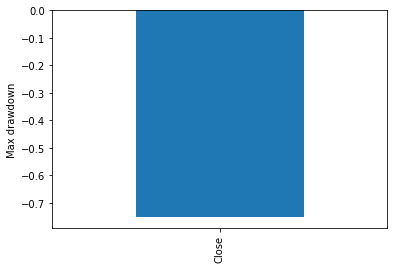

In [7]:
def max_drawdown(return_series):
    comp_ret = (return_series + 1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


max_drawdowns = datapct.apply(max_drawdown,axis=0)
max_drawdowns.plot.bar()
plt.ylabel('Max drawdown')
max_drawdowns 


# Calmar Ratio

Calmar = $R_a/$ max drawdown

$R_a$ = Annual return of the asset  

In [8]:
datapct.mean()/max_drawdowns

Close   -0.000444
dtype: float64